In [1]:
from mitoolspro.regressions import linearfactor_models
from linearmodels.datasets import french
import seaborn as sns

# Linear Factor from Linearmodels

https://bashtage.github.io/linearmodels/asset-pricing/examples/examples.html

## Import data

The data used comes from Ken French”s [website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) and includes 4 factor returns, the excess market, the size factor, the value factor and the momentum factor. The available test portfolios include the 12 industry portfolios, a subset of the size-value two way sort, and a subset of the size-momentum two way sort.



In [2]:
data = french.load()
print(french.DESCR)


Data from Ken French's data library
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

dates    Year and Month of Return
MktRF    Market Factor
SMB      Size Factor
HML      Value Factor
Mom      Momentum Factor
RF       Risk-free rate
NoDur    Industry: Non-durables
Durbl    Industry: Durables
Manuf    Industry: Manufacturing
Enrgy    Industry: Energy
Chems    Industry: Chemicals
BusEq    Industry: Business Equipment
Telcm    Industry: Telecoms
Utils    Industry: Utilities
Shops    Industry: Retail
Hlth     Industry: Health care
Money    Industry: Finance
Other    Industry: Other
S1V1     Small firms, low value
S1V3     Small firms, medium value
S1V5     Small firms, high value
S3V1     Size 3, value 1
S3V3     Size 3, value 3
S3V5     Size 3, value 5
S5V1     Large firms, Low value
S5V3     Large firms, medium value
S5V5     Large Firms, High value
S1M1     Small firms, losers
S1M3     Small firms, neutral
S1M5     Small firms, winners
S3M1     Size 3, momentu

## Transform the portfolios to be excesses

Subtract the risk-free rate from the test portfolios since these are not zero-investment.

In [3]:
data.iloc[:, 6:] = data.iloc[:, 6:].values - data[["RF"]].values

## 1-Step Estimation using Seemingly Unrelated Regression (SUR)

When the factors are traded assets, they must price themselves, and so the observed factor returns can be used to consistently estimate the expected factor returns. This also allows a set of seemingly unrelated regressions where each test portfolio is regressed on the factors and a constant to estimate factor loadings and $\alpha$ s.

Note that when using this type of model, it is essential that the test portfolios are excess returns. This is not a requirement of the other factor model estimators.

This specification is a CAP-M since only the market is included. The J-statistic tests whether all model $\alpha$ s are 0. The CAP-M is unsurprisingly unable to price the test portfolios.

In [4]:
portfolios = ["S1V1", "S1V3", "S1V5", "S3V1", "S3V3", "S3V5", "S5V1", "S5V3", "S5V5"]
factors = ["MktRF"]
model = linearfactor_models.TradedFactorModel(data=data, portfolios=portfolios, factors=factors)
res = model.fit()
print(res)


                      TradedFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.6910
No. Factors:                          1   J-statistic:                    70.034
No. Observations:                   819   P-value                         0.0000
Date:                  Wed, Mar 19 2025   Distribution:                  chi2(9)
Time:                          22:19:13                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
MktRF          0.0065     0.0015     4.3553     0.0000      0.0035      0.0094

Covariance estimator:
Heteroskedast

The factor set is expanded to include both the size and the value factors.

While the extra factors lower the J statistic and increases the $R^{2}$, the model is still easily rejected.

In [5]:
factors = ["MktRF", "SMB", "HML"]
model = linearfactor_models.TradedFactorModel(data=data, portfolios=portfolios, factors=factors)
res = model.fit()
print(res)

                      TradedFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.8971
No. Factors:                          3   J-statistic:                    53.271
No. Observations:                   819   P-value                         0.0000
Date:                  Wed, Mar 19 2025   Distribution:                  chi2(9)
Time:                          22:19:13                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
HML            0.0035     0.0009     3.6993     0.0002      0.0016      0.0053
MktRF          0.0065     0.0015    

Changing the test portfolios to include only the industry portfolios does not allow factors to price the assets.

In [6]:
indu = [
    "NoDur",
    "Durbl",
    "Manuf",
    "Enrgy",
    "Chems",
    "BusEq",
    "Telcm",
    "Utils",
    "Shops",
    "Hlth",
    "Money",
    "Other",
]
model = linearfactor_models.TradedFactorModel(data=data, portfolios=indu, factors=factors)
res = model.fit()
print(res)

                      TradedFactorModel Estimation Summary                      
No. Test Portfolios:                 12   R-squared:                      0.7118
No. Factors:                          3   J-statistic:                    61.617
No. Observations:                   819   P-value                         0.0000
Date:                  Wed, Mar 19 2025   Distribution:                 chi2(12)
Time:                          22:19:13                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
HML            0.0035     0.0009     3.6993     0.0002      0.0016      0.0053
MktRF          0.0065     0.0015    

The estimated factor loadings ($\beta$ s) can be displayed using the `betas` property. There is reasonable dispersion in the factor loadings for all of the factors, except possibly the market which are all close to unity.

In [7]:
print(res.betas)

            HML     MktRF       SMB
NoDur  0.080556  0.803334 -0.029383
Durbl  0.466510  1.176659  0.104124
Manuf  0.197135  1.129601  0.094600
Enrgy  0.264609  0.913425 -0.234012
Chems  0.092021  0.970844 -0.179466
BusEq -0.543462  1.152119  0.182299
Telcm  0.044042  0.782811 -0.158395
Utils  0.260051  0.605203 -0.175549
Shops -0.010064  0.942997  0.135802
Hlth  -0.315180  0.864135 -0.213336
Money  0.378365  1.112368 -0.053364
Other  0.237830  1.109851  0.304442


<Axes: >

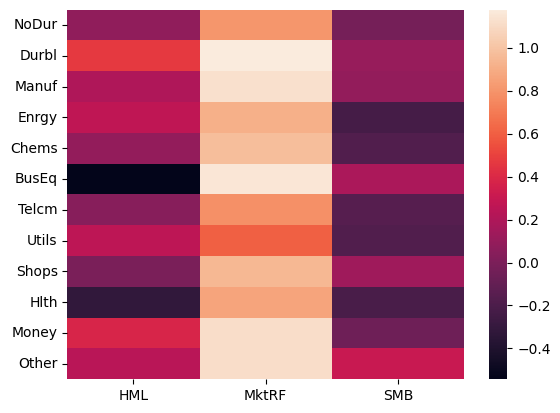

In [8]:
sns.heatmap(res.betas)

Similarly the $\alpha$ s can be displayed. These are monthly returns, and so scaling by 12 shows annualized returns. Healthcare has the largest pricing error.

In [9]:
12 * res.alphas

NoDur    0.023360
Durbl   -0.030919
Manuf   -0.010643
Enrgy    0.012009
Chems    0.002783
BusEq    0.024215
Telcm    0.009726
Utils    0.017078
Shops    0.009952
Hlth     0.050760
Money   -0.015197
Other   -0.033345
Name: alpha, dtype: float64

## 2-Step Estimation

When one of more factors are not returns on traded assets, it is necessary to use a two-step procedure (or GMM). In the 2-step estimator, the first estimates factor loadings and the second uses the factor loadings to estimate the risk premia.

Here all four factors are used to attempt to price the size-momentum portfolios.

In [10]:
factors = ["MktRF", "SMB", "HML", "Mom"]
portfolios = ["S1M1", "S1M3", "S1M5", "S3M1", "S3M3", "S3M5", "S5M1", "S5M3", "S5M5"]
model = linearfactor_models.LinearFactorModel(data=data, portfolios=portfolios, factors=factors)
res = model.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.9051
No. Factors:                          4   J-statistic:                    36.929
No. Observations:                   819   P-value                         0.0000
Date:                  Wed, Mar 19 2025   Distribution:                  chi2(5)
Time:                          22:19:13                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
HML            0.0084     0.0025     3.3085     0.0009      0.0034      0.0133
MktRF          0.0070     0.0015    

In [11]:
print(res.betas)

           HML     MktRF       Mom       SMB
S1M1  0.244844  1.092658 -0.691191  1.224223
S1M3  0.459326  0.874285 -0.082546  0.881880
S1M5  0.239957  1.047256  0.297941  1.147949
S3M1  0.059730  1.156849 -0.760059  0.623684
S3M3  0.333619  0.948556 -0.135465  0.467783
S3M5  0.051098  1.128861  0.413705  0.713403
S5M1 -0.062397  1.138597 -0.755032 -0.112936
S5M3  0.095270  0.946214 -0.100067 -0.200052
S5M5 -0.069780  1.078098  0.467172 -0.046531


The identification requirements for this model are the $\beta$ s have unique variation – this requires some cross-sectional differences in exposures and that the loadings are not excessively correlated. Since these test portfolios do not attempt to sort on value, it is relatively non-dispersed and also correlated with both the market and size. This might make the inference unreliable.

In [12]:
print(res.betas.corr())

            HML     MktRF       Mom       SMB
HML    1.000000 -0.733916  0.002744  0.638056
MktRF -0.733916  1.000000 -0.253675 -0.001914
Mom    0.002744 -0.253675  1.000000 -0.015628
SMB    0.638056 -0.001914 -0.015628  1.000000


The size factor was insignificant and so is dropped. This does not have much of an effect on the estimates.

In [13]:
factors = ["MktRF", "HML", "Mom"]
portfolios = ["S1M1", "S1M3", "S1M5", "S3M1", "S3M3", "S3M5", "S5M1", "S5M3", "S5M5"]
model = linearfactor_models.LinearFactorModel(data=data, portfolios=portfolios, factors=factors)
print(model.fit())

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.7915
No. Factors:                          3   J-statistic:                    36.406
No. Observations:                   819   P-value                         0.0000
Date:                  Wed, Mar 19 2025   Distribution:                  chi2(6)
Time:                          22:19:13                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
HML            0.0091     0.0027     3.4361     0.0006      0.0039      0.0143
MktRF          0.0073     0.0017    

The risk-free rate can be optionally estimated. This is useful in case excess returns are not available of if the risk-free rate used to construct the excess returns might be misspecified.

Here the estimated risk-free rate is small and insignificant and has little impact on the model J-statistic.

In [14]:
factors = ["MktRF", "HML", "Mom"]
portfolios = ["S1M1", "S1M3", "S1M5", "S3M1", "S3M3", "S3M5", "S5M1", "S5M3", "S5M5"]
model = linearfactor_models.LinearFactorModel(
    data=data, portfolios=portfolios, factors=factors, risk_free=True
)
print(model.fit())

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.7915
No. Factors:                          3   J-statistic:                    36.011
No. Observations:                   819   P-value                         0.0000
Date:                  Wed, Mar 19 2025   Distribution:                  chi2(5)
Time:                          22:19:13                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
risk_free     -0.0045     0.0079    -0.5607     0.5750     -0.0200      0.0111
HML            0.0110     0.0053    

The default covariance estimator allows for heteroskedasticity but assumes there is no autocorrelation in the model errors or factor returns. Kernel-based HAC estimators (e.g. Newey-West) can be used by setting `cov_type="kernel"`.

This reduces the J-statistic indicating there might be some serial correlation although the model is still firmly rejected.

In [15]:
model = linearfactor_models.LinearFactorModel(data=data, portfolios=portfolios, factors=factors)
print(model.fit(cov_type="kernel"))

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                  9   R-squared:                      0.7915
No. Factors:                          3   J-statistic:                    25.841
No. Observations:                   819   P-value                         0.0002
Date:                  Wed, Mar 19 2025   Distribution:                  chi2(6)
Time:                          22:19:13                                         
Cov. Estimator:                  kernel                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
HML            0.0091     0.0031     2.9499     0.0032      0.0031      0.0152
MktRF          0.0073     0.0017    

## GMM Estimation

The final estimator is the GMM estimator which is similar to estimating the 2-step model in a single step. In practice the GMM estimator is estimated at least twice, once to get an consistent estimate of the covariance of the moment conditions and the second time to efficiently estimate parameters.

The GMM estimator does not have a closed form and so a non-linear optimizer is required. The default output prints the progress every 10 iterations. Here the model is fit twice, which is the standard method to implement efficient GMM.

## GMM Estimation

The final estimator is the GMM estimator which is similar to estimating the 2-step model in a single step. In practice the GMM estimator is estimated at least twice, once to get an consistent estimate of the covariance of the moment conditions and the second time to efficiently estimate parameters.

The GMM estimator does not have a closed form and so a non-linear optimizer is required. The default output prints the progress every 10 iterations. Here the model is fit twice, which is the standard method to implement efficient GMM.

In [16]:
model = linearfactor_models.LinearFactorGMMModel(data=data, portfolios=portfolios, factors=factors)
res = model.fit()
print(res)

Iteration: 0, Objective: 47.75791582813392
Iteration: 10, Objective: 28.102585579931574
Iteration: 20, Objective: 26.361383199658032
Iteration: 30, Objective: 26.019664638939705
Iteration: 40, Objective: 22.32534325297994
         Current function value: 22.325343
         Iterations: 41
         Function evaluations: 2290
         Gradient evaluations: 67
Iteration: 0, Objective: 22.5193503288998


/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/.venv/lib/python3.12/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


Iteration: 10, Objective: 22.30373026681217
Iteration: 20, Objective: 22.226426702971146
Iteration: 30, Objective: 22.193079384185
         Current function value: 22.066871
         Iterations: 40
         Function evaluations: 1972
         Gradient evaluations: 58
                    LinearFactorModelGMM Estimation Summary                     
No. Test Portfolios:                  9   R-squared:                      0.7904
No. Factors:                          3   J-statistic:                    22.067
No. Observations:                   819   P-value                         0.0012
Date:                  Wed, Mar 19 2025   Distribution:                  chi2(6)
Time:                          22:19:14                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
     

/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/.venv/lib/python3.12/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


Kernel HAC estimators can be used with this estimator as well. Using a kernel HAC covariance also implies a Kernel HAC weighting matrix estimator.

Here the GMM estimator along with the HAC estimator indicates that these factors might be able to price this set of 9 test portfolios. `disp=0` is used to suppress iterative output.

In [17]:
res = model.fit(cov_type="kernel", kernel="bartlett", disp=0)
print(res)

                    LinearFactorModelGMM Estimation Summary                     
No. Test Portfolios:                  9   R-squared:                      0.7901
No. Factors:                          3   J-statistic:                    13.833
No. Observations:                   819   P-value                         0.0316
Date:                  Wed, Mar 19 2025   Distribution:                  chi2(6)
Time:                          22:19:15                                         
Cov. Estimator:                  kernel                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
HML            0.0137     0.0030     4.5918     0.0000      0.0078      0.0195
MktRF          0.0074     0.0014    

### Iterating until convergence

The standard approach is efficient and uses 2-steps. The first consistently estimates parameters using a sub-optimal weighting matrix, and the second uses the optimal weighting matrix conditional using the first stage estimates.

This method can be repeated until convergence, or for a fixed number of steps using the `steps` keyword argument.

In [18]:
res = model.fit(steps=10, disp=25)
print(res)

Iteration: 0, Objective: 47.75791582813392
Iteration: 25, Objective: 26.280318481164848


/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/.venv/lib/python3.12/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 22.325343
         Iterations: 41
         Function evaluations: 2290
         Gradient evaluations: 67
Iteration: 0, Objective: 22.5193503288998
Iteration: 25, Objective: 22.222217425353072
         Current function value: 22.066871
         Iterations: 40
         Function evaluations: 1972
         Gradient evaluations: 58
Iteration: 0, Objective: 22.094157057035385


/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/.venv/lib/python3.12/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


Iteration: 25, Objective: 22.091266647024376


/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/.venv/lib/python3.12/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 22.089908
         Iterations: 37
         Function evaluations: 2664
         Gradient evaluations: 78
Iteration: 0, Objective: 22.08879829273572
Iteration: 25, Objective: 22.088771432816475


/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/.venv/lib/python3.12/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 22.088753
         Iterations: 42
         Function evaluations: 3446
         Gradient evaluations: 101
Iteration: 0, Objective: 22.088622398106004


/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/.venv/lib/python3.12/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 22.088622
         Iterations: 4
         Function evaluations: 1504
         Gradient evaluations: 44
Iteration: 0, Objective: 22.08862232141921
         Current function value: 22.088622
         Iterations: 3
         Function evaluations: 1542
         Gradient evaluations: 45
                    LinearFactorModelGMM Estimation Summary                     
No. Test Portfolios:                  9   R-squared:                      0.7904
No. Factors:                          3   J-statistic:                    22.089
No. Observations:                   819   P-value                         0.0012
Date:                  Wed, Mar 19 2025   Distribution:                  chi2(6)
Time:                          22:19:18                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Prem

/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/.venv/lib/python3.12/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


## Continuosly Updating Estimator

The Continuously Updating Estimator (CUE) is optionally available using the flag `use_cue`. CUE jointly minimizes the J-statistic as a function of the moment conditions and the weighting matrix, rather than iterating between minimizing the J-statistic for a fixed weighting matrix and updating the weighting matrix.

Here the results are essentially the same as in the iterative approach.

In [19]:
res = model.fit(use_cue=True)
print(res)

Iteration: 0, Objective: 47.75791582813392
Iteration: 10, Objective: 28.102585579931574
Iteration: 20, Objective: 26.361383199658032
Iteration: 30, Objective: 26.019664638939705
Iteration: 40, Objective: 22.32534325297994


/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/.venv/lib/python3.12/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 22.325343
         Iterations: 41
         Function evaluations: 2290
         Gradient evaluations: 67
Iteration: 0, Objective: 22.524487333254097
Iteration: 10, Objective: 22.386077416378168
Iteration: 20, Objective: 22.339828082710273
Iteration: 30, Objective: 22.308332125107963
         Current function value: 22.077574
         Iterations: 38
         Function evaluations: 2902
         Gradient evaluations: 85
                    LinearFactorModelGMM Estimation Summary                     
No. Test Portfolios:                  9   R-squared:                      0.7903
No. Factors:                          3   J-statistic:                    22.719
No. Observations:                   819   P-value                         0.0009
Date:                  Wed, Mar 19 2025   Distribution:                  chi2(6)
Time:                          22:19:19                                         
Cov. Estimator:                  robust                      

/Users/sebastian/Desktop/MontagnaInc/Projects/miToolsPro/.venv/lib/python3.12/site-packages/scipy/optimize/_minimize.py:733: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


***